In [1]:
import numpy as np
from numpy.random import exponential, randint
from numpy import *   #ones, cumsum, sum, isscalar
from matplotlib.pylab import * 
%matplotlib inline
plotose = True
import pickle


In [2]:
from data_Fullset import SCxL23_shcr as exppar


In [15]:
shflag = 'sh'
condition = '1000_70_65'

In [3]:
with open("data_Fullset/Fullset.pkl","rb") as f:
    data = pickle.load(f)

In [4]:
for key in data.keys():
    print(key,":",data[key].shape)

#Sp : (390,)
#Bch : (390,)
Dsb : (390,)
Dss : (390,)
d_interSp : (390,)
Vtot : (390,)
Vh : (390,)
Ln : (390,)
SA : (390,)
nPSD : (390,)
A1 : (390,)
A2 : (390,)
GPHN_SNR : (390,)
DiS-EMchk : (390,)
Lneck : (390,)
maxDneck : (390,)
minDneck : (390,)
meanDneck : (390,)
Rneck : (390,)
Lhead : (390,)
maxDhead : (390,)
minDhead : (390,)
meanDhead : (390,)
Ah : (390,)
Rhead : (390,)
meanDneck_trunc70pc : (390,)


In [5]:
import pandas as pd

In [6]:
gAMPA = pd.DataFrame((data['A1']*exppar.gtrA)*1e3)
gNMDA = pd.DataFrame((data['A1']*exppar.gtrN)*1e3)

print(gAMPA.describe())
print(gNMDA.describe())

               A1
count  384.000000
mean     0.455979
std      0.434453
min      0.037986
25%      0.153269
50%      0.307392
75%      0.609916
max      3.130098
               A1
count  384.000000
mean     0.497596
std      0.474105
min      0.041453
25%      0.167257
50%      0.335447
75%      0.665583
max      3.415782


In [357]:
exppar.gtrG

0.0058596073805616536

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c22e0f358>]],
      dtype=object)

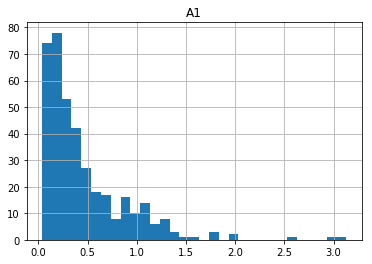

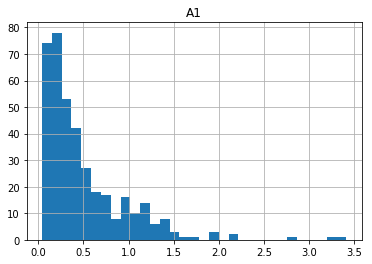

In [8]:
gAMPA.hist(bins=31)
gNMDA.hist(bins=31)

In [9]:
with open("data_Fullset/shPSD_Morphometry.pkl","rb") as f:
    datash = pickle.load(f)

In [10]:
gGABA = pd.DataFrame((datash['A']*exppar.gtrG)*1e3)
gGABA.describe()

,A
count,61.000000
mean,1.000000
std,0.577148
min,0.328792
25%,0.632949
50%,0.850551
75%,1.257237
max,3.357836


In [11]:
gGABADiS = pd.DataFrame((data['A2'][data['A2']>0]*exppar.gtrG)*1e3)
gGABADiS.describe()

,A2
count,37.000000
mean,0.527511
std,0.277050
min,0.185705
25%,0.329125
50%,0.479948
75%,0.618991
max,1.560619


In [12]:
import pickle

In [16]:
folderstore = '/mnt/data/spinemodel/conditions/'

with open(folderstore+"All_baseline_datasetv3_"+condition+shflag+".pickle","rb") as f:
    vavgT,mesT,vtracsT,vtracsDT,vtracsST,CtracsT,me2T,_,dataT = pickle.load(f)

with open(folderstore+"All_baseline_depinhv3_"+condition+shflag+".pickle","rb") as f:
    messh,iPSDsh,posish,mesDiSI,spdataI = pickle.load(f)
   

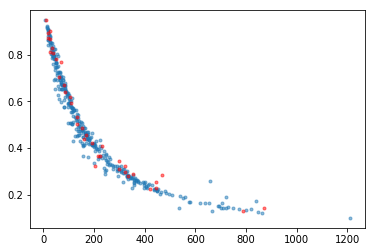

In [17]:
s0 = dataT['A2']>0
s1 = ~s0
plt.plot(abs(mesT[s1,0]),(mesT[s1,2])/mesT[s1,1],'.',label="Spine head",alpha=0.5)
plt.plot(abs(mesT[s0,0]),(mesT[s0,2])/mesT[s0,1],'.',c='r',label="Spine head",alpha=0.5)


In [18]:
attenuation = pd.DataFrame((mesT[:,2])/mesT[:,1])
(attenuation<0.9).sum()/attenuation.shape[0]

0    0.976562
dtype: float64

In [19]:
(1-attenuation).describe()

,0
count,384.000000
mean,0.505922
std,0.219489
min,0.051625
25%,0.329438
50%,0.535004
75%,0.696112
max,0.899794


Rneck for 50% attenuation: 145
Fraction of spines that attenuates more than 50%: 0.5520833333333334


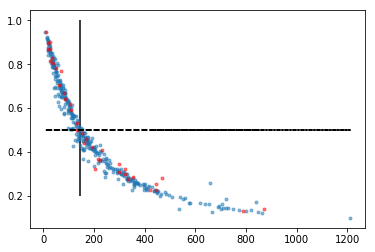

In [28]:
s0 = dataT['A2']>0
s1 = ~s0
plt.plot(abs(mesT[s1,0]),(mesT[s1,2])/mesT[s1,1],'.',label="Spine head",alpha=0.5)
plt.plot(abs(mesT[s0,0]),(mesT[s0,2])/mesT[s0,1],'.',c='r',label="Spine head",alpha=0.5)
plot(abs(mesT[s1,0]),abs(mesT[s1,0])*0+1.0-.5,'k--')
#vlines(165,0.2,1.0)
vlines(145,0.2,1.0)
#vlines(135,0.2,1.0)

print('Rneck for 50% attenuation:', 145)
print('Fraction of spines that attenuates more than 50%:', (attenuation.values<0.5).sum()/attenuation.shape[0] )


In [29]:
def getint(x):
    xc = x*1.0
    xc.sort()
    sh = xc.shape[0]
    xmed = xc[sh//2]
    s0= int(sh*(1-.6827)/2)
    s1 = sh-s0
    x0 = xc[s0]
    x1 = xc[s1]
    s0b= int(sh*(1-.95)/2)
    s1b = sh-s0b
    x0b = xc[s0b]
    x1b = xc[s1b]
    return((xmed,x0,x1,x0b,x1b))

print(mesT[:,1].mean(),getint(mesT[:,1]))
pd.DataFrame(mesT[:,1]).describe()

6.946507339749727 (5.323205718230199, 2.396496833578766, 10.958928516460446, 1.3682689257722984, 22.321745499437498)


,0
count,384.000000
mean,6.946507
std,6.280840
min,0.721520
25%,3.035271
50%,5.315348
75%,8.692157
max,55.378814


In [30]:
data = {}

with open(folderstore+"dis_baselinev3_"+condition+shflag+".pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_baseline"] = [vtracs,Ctracs]
with open(folderstore+"dis_ga_glu05v3_"+condition+shflag+".pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gaglu"] = [vtracs,Ctracs]
with open(folderstore+"dis_glu_ga05v3_"+condition+shflag+".pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gluga"] = [vtracs,Ctracs]
data["sis_gaglu"] = [vtracs,Ctracs]
data["sis_gluga"] = [vtracs,Ctracs]

with open(folderstore+"inhibition_v3_"+condition+shflag+".pickle","rb") as f:
    tdels,inhtimDis,_,tauDis,tauDis2,inhtimDism = pickle.load(f)

with open(folderstore+"inhibition_v3_outPSD_"+condition+shflag+".pickle","rb") as f:
    tdels,inhtimSis,_,tauSis,tauSis2,inhtimSism = pickle.load(f)


20.1% faster decay for shaft inh
15.6% faster decay for spinous inh


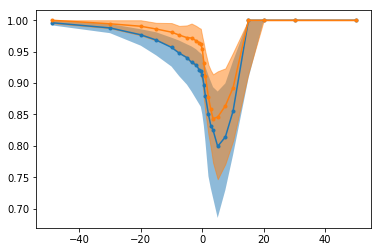

In [31]:
vm,sl,sv = tauSis2[:,15],tauSis2[:,16],tauSis2[:,17]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5)
print('{:.1f}% faster decay for shaft inh'.format(100*(1-vm.min())))
vm,sl,sv = tauDis2[:,15],tauDis2[:,16],tauDis2[:,17]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
print('{:.1f}% faster decay for spinous inh'.format(100*(1-vm.min())))

In Sv spine head:
Spinous inh - median 11.2, shaft inh - median 2.2


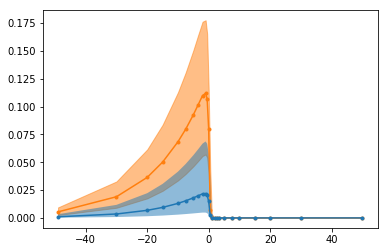

In [32]:

vm,sl,sv = 1-inhtimDis[:,0],1-inhtimDis[:,1],1-inhtimDis[:,2]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
vmsp = vm.copy()

vm,sl,sv = 1-inhtimSis[:,0],1-inhtimSis[:,1],1-inhtimSis[:,2]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5)

print('In Sv spine head:')
print('Spinous inh - median {:.1f}, shaft inh - median {:.1f}'.format(
               100*vmsp.max(), 100*vm.max() ))

In Sv dend shaft:
Spinous inh - median 13.13, shaft inh - median 9.35


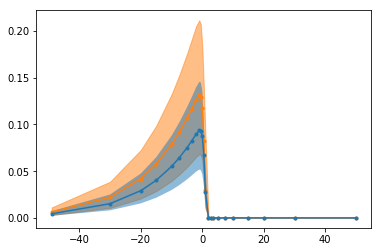

In [33]:


vm,sl,sv = 1-inhtimDis[:,1*5],1-inhtimDis[:,1*5+1],1-inhtimDis[:,1*5+2]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
vmsp = vm.copy()

vm,sl,sv = 1-inhtimSis[:,1*5],1-inhtimSis[:,1*5+1],1-inhtimSis[:,1*5+2]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5)


print('In Sv dend shaft:')
print('Spinous inh - median {:.2f}, shaft inh - median {:.2f}'.format(
               100*vmsp.max(), 100*vm.max() ))

Calcium in sp head:
Spinous inh - median 3.83, shaft inh - median 2.07


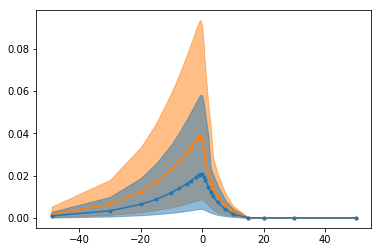

In [34]:

vm,sl,sv = 1-inhtimDis[:,3*5],1-inhtimDis[:,3*5+1],1-inhtimDis[:,3*5+2]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
vmsp = vm.copy()

vm,sl,sv = 1-inhtimSis[:,3*5],1-inhtimSis[:,3*5+1],1-inhtimSis[:,3*5+2]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5,color='C0')
#ax2.set_axis_off()

print('Calcium in sp head:')
print('Spinous inh - median {:.2f}, shaft inh - median {:.2f}'.format(
               100*vmsp.max(), 100*vm.max() ))

In [36]:
print('maximal q=0.66 :',(1-inhtimDis[:,3*5+1]).max()*100)

maximal q=0.66 : 9.349587540013482


In [38]:
data = {}
condition = '1000_80_65'

with open(folderstore+"dis_baselinev3_"+condition+shflag+".pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_baseline"] = [vtracs,Ctracs]
with open(folderstore+"dis_ga_glu05v3_"+condition+shflag+".pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gaglu"] = [vtracs,Ctracs]
with open(folderstore+"dis_glu_ga05v3_"+condition+shflag+".pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gluga"] = [vtracs,Ctracs]
data["sis_gaglu"] = [vtracs,Ctracs]
data["sis_gluga"] = [vtracs,Ctracs]

with open(folderstore+"inhibition_v3_"+condition+shflag+".pickle","rb") as f:
    tdels,inhtimDis,_,tauDis,tauDis2,inhtimDism = pickle.load(f)

with open(folderstore+"inhibition_v3_outPSD_"+condition+shflag+".pickle","rb") as f:
    tdels,inhtimSis,_,tauSis,tauSis2,inhtimSism = pickle.load(f)


74.8% faster decay for shaft inh
64.0% faster decay for spinous inh


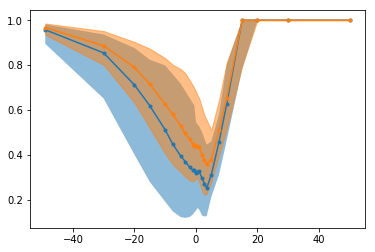

In [39]:
vm,sl,sv = tauSis2[:,15],tauSis2[:,16],tauSis2[:,17]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5)
print('{:.1f}% faster decay for shaft inh'.format(100*(1-vm.min())))
vm,sl,sv = tauDis2[:,15],tauDis2[:,16],tauDis2[:,17]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
print('{:.1f}% faster decay for spinous inh'.format(100*(1-vm.min())))

In spine head:
Spinous inh - median 26.3, shaft inh - median 16.2


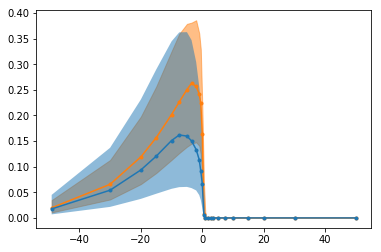

In [40]:
vm,sl,sv = 1-inhtimDis[:,0],1-inhtimDis[:,1],1-inhtimDis[:,2]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
vmsp = vm.copy()

vm,sl,sv = 1-inhtimSis[:,0],1-inhtimSis[:,1],1-inhtimSis[:,2]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5)

print('In spine head:')
print('Spinous inh - median {:.1f}, shaft inh - median {:.1f}'.format(
               100*vmsp.max(), 100*vm.max() ))

In dend shaft:
Spinous inh - median 33.08, shaft inh - median 37.62


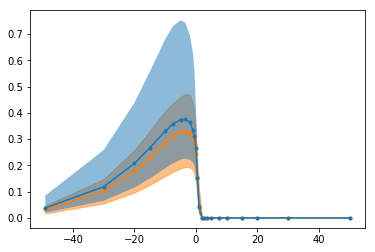

In [41]:
vm,sl,sv = 1-inhtimDis[:,1*5],1-inhtimDis[:,1*5+1],1-inhtimDis[:,1*5+2]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
vmsp = vm.copy()

vm,sl,sv = 1-inhtimSis[:,1*5],1-inhtimSis[:,1*5+1],1-inhtimSis[:,1*5+2]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5)


print('In dend shaft:')
print('Spinous inh - median {:.2f}, shaft inh - median {:.2f}'.format(
               100*vmsp.max(), 100*vm.max() ))

Calcium in sp head:
Spinous inh - median 10.07, shaft inh - median 8.59


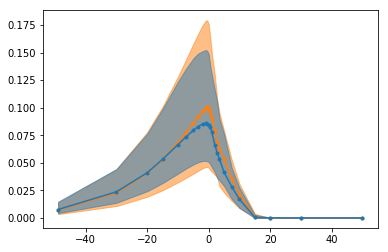

In [42]:
vm,sl,sv = 1-inhtimDis[:,3*5],1-inhtimDis[:,3*5+1],1-inhtimDis[:,3*5+2]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
vmsp = vm.copy()

vm,sl,sv = 1-inhtimSis[:,3*5],1-inhtimSis[:,3*5+1],1-inhtimSis[:,3*5+2]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5,color='C0')
#ax2.set_axis_off()

print('Calcium in sp head:')
print('Spinous inh - median {:.2f}, shaft inh - median {:.2f}'.format(
               100*vmsp.max(), 100*vm.max() ))

In [132]:
ecls = np.arange(11)+70
inVDiS = {}
inVshI = {}
inCDiS = {}
inCshI = {}
tauDiS = {}
taushI = {}

for ecl in ecls:
    condition = '1000_'+str(ecl)+'_65'
    with open(folderstore+"inhibition_v3_"+condition+shflag+".pickle","rb") as f:
        tdels,inhtimDis,_,tauDis,tauDis2,inhtimDism = pickle.load(f)

    with open(folderstore+"inhibition_v3_outPSD_"+condition+shflag+".pickle","rb") as f:
        tdels,inhtimSis,_,tauSis,tauSis2,inhtimSism = pickle.load(f)
   
    with open(folderstore+"inhibition_v3_"+condition+"_btstrp"+shflag+".pickle","rb") as f:
        tdels_b,inhtimDis_b,_,tauDis_b,tauDis2_b,inhtimDism_b = pickle.load(f)

    # Jupyter notebook: Proper Spine Model - Inhibition outside
    with open(folderstore+"inhibition_v3_outPSD_"+condition+"_btstrp"+shflag+".pickle","rb") as f:
        tdels_b,inhtimSis_b,_,tauSis_b,tauSis2_b,inhtimSism_b = pickle.load(f)    
        
    inVDiS[ecl] = 1-inhtimDis[:,0],1-inhtimDis_b[:,1],1-inhtimDis_b[:,2]
    inVshI[ecl] = 1-inhtimSis[:,0],1-inhtimSis_b[:,1],1-inhtimSis_b[:,2]
    inCDiS[ecl] = 1-inhtimDis[:,3*5],1-inhtimDis_b[:,3*5+1],1-inhtimDis_b[:,3*5+2]
    inCshI[ecl] = 1-inhtimSis[:,3*5],1-inhtimSis_b[:,3*5+1],1-inhtimSis_b[:,3*5+2]
    taushI[ecl] = tauSis2[:,15],tauSis2_b[:,16],tauSis2_b[:,17]
    tauDiS[ecl] = tauDis2[:,15],tauDis2_b[:,16],tauDis2_b[:,17]

In [133]:
maxs = np.zeros((len(ecls), 18))
for i, ecl in enumerate(ecls):
    for j, ds in enumerate([inVDiS, inVshI, inCDiS, inCshI, taushI, tauDiS]):
        amax = ds[ecl][0].argmax() 
        if j>3:
            amax = ds[ecl][0].argmin()
        #print((3*j), (3*(j+1)))
        maxs[i,(3*j):(3*(j+1))] = [ds[ecl][k][amax] for k in range(3)]

In [134]:
maxs = np.column_stack((-ecls, maxs))

In [135]:
maxs = pd.DataFrame(maxs, columns= ['Ecl','SV_spI','SV_spI_l','SV_spI_u'
                                    ,'SV_shI','SV_shI_l','SV_shI_u',
                                   'SC_spI', 'SC_spI_l', 'SC_spI_u',
                                    'SC_shI', 'SC_shI_l', 'SC_shI_u',
                                   'tau_spI', 'tau_spI_l', 'tau_spI_u',
                                    'tau_shI', 'tau_shI_l', 'tau_shI_u'])

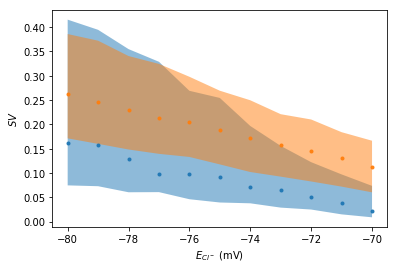

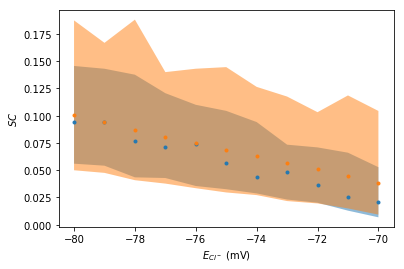

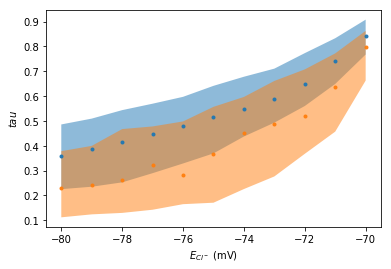

In [136]:
quantities = ['SV','SC','tau']
for quantity in quantities:
    fig = figure()
    cases = ['shI','spI']
    for case in cases:
        label = quantity+'_'+case
        plt.fill_between(maxs['Ecl'],
                         maxs[label+'_l'],
                         maxs[label+'_u'], alpha = 0.5)
        plt.plot(maxs['Ecl'],maxs[label],'.',alpha = 0.95)
    plt.xlabel('$E_{Cl^-}$ (mV)')
    plt.ylabel('$'+quantity+'$')

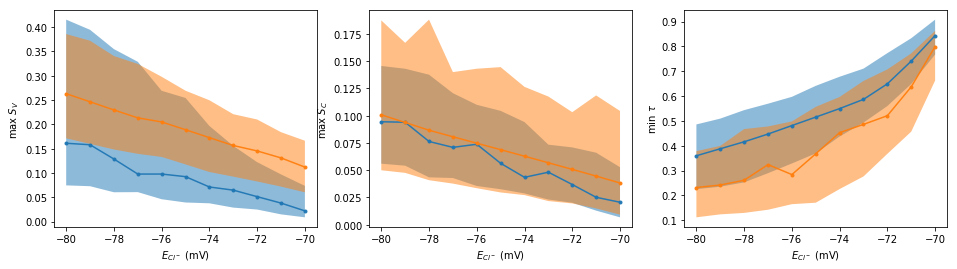

In [137]:
fig, axs = plt.subplots(1,3, figsize = (16,4))
quantities = ['SV','SC','tau']
for ax, quantity in zip(axs,quantities):
    cases = ['shI','spI']
    for case in cases:
        label = quantity+'_'+case
        ax.fill_between(maxs['Ecl'],
                         maxs[label+'_l'],
                         maxs[label+'_u'], alpha = 0.5)
        ax.plot(maxs['Ecl'],maxs[label],'.-',alpha = 0.95)
    ax.set_xlabel('$E_{Cl^-}$ (mV)')
    ax.set_ylabel('$'+quantity+'$')

axs[0].set_ylabel('max $S_V$')
axs[1].set_ylabel('max $S_C$')
axs[2].set_ylabel('min $\\tau$')
fig.savefig('shuntinfgvsrevpotential.png', dpi = 300, tight_layout = True)



In [251]:

ecl = 70
condition = '1000_'+str(ecl)+'_65'
with open(folderstore+"inhibition_v3_"+condition+shflag+".pickle","rb") as f:
    tdels,inhtimDis,_,tauDis,tauDis2,inhtimDism = pickle.load(f)

with open(folderstore+"inhibition_v3_outPSD_"+condition+shflag+".pickle","rb") as f:
    tdels,inhtimSis,_,tauSis,tauSis2,inhtimSism = pickle.load(f)

with open(folderstore+"inhibition_v3_"+condition+"_btstrp"+shflag+".pickle","rb") as f:
    tdels_b,inhtimDis_b,_,tauDis_b,tauDis2_b,inhtimDism_b = pickle.load(f)

# Jupyter notebook: Proper Spine Model - Inhibition outside
with open(folderstore+"inhibition_v3_outPSD_"+condition+"_btstrp"+shflag+".pickle","rb") as f:
    tdels_b,inhtimSis_b,_,tauSis_b,tauSis2_b,inhtimSism_b = pickle.load(f)    

with open(folderstore+"All_baseline_datasetv3_"+condition+shflag+".pickle","rb") as f:
    vavgT,mesT,vtracsT,vtracsDT,vtracsST,CtracsT,me2T,_,dataT = pickle.load(f)

with open(folderstore+"All_baseline_depinhv3_"+condition+shflag+".pickle","rb") as f:
    messh,iPSDsh,posish,mesDiSI,spdataI = pickle.load(f)
    
with open(folderstore+"dis_ga_glu02v3_"+condition+"sh.pickle","rb") as f:
    dis,mes1,mes01 = pickle.load(f)

with open(folderstore+"dis_glu_ga02v3_"+condition+"sh.pickle","rb") as f:
    dis,mes,mes0,times,times0 = pickle.load(f)

In [147]:
labels = ['Vsp','Vsh','Vsoma','Calcium']
output = pd.DataFrame(mesT[:,1:5], columns = labels)
pddataT = pd.DataFrame(dataT, columns = dataT.keys())

In [157]:
output.columns

Index(['Vsp', 'Vsh', 'Vsoma', 'Calcium'], dtype='object')

In [241]:
from pandas.core.dtypes.missing import notna

#from pandas.io.formats.printing import pprint_thing
#from pandas.plotting._matplotlib.style import _get_standard_colors
#from pandas.plotting._matplotlib.tools import _set_ticks_props, _subplots


def scatter_matrix_xy(
    frame, x, y = None,
    alpha=0.5,
    figsize=None,
    ax=None,
    grid=False,
    diagonal="hist",
    marker=".",
    density_kwds=None,
    hist_kwds=None,
    range_padding=0.05,
    **kwds
):

    df = frame._get_numeric_data()
    if y is None:
        y = list(df.columns)
        
    nx = len(x)
    ny = len(y)
    naxes = nx * ny
    fig, axes = plt.subplots(ny, nx, figsize=figsize, squeeze=False)

    # no gaps between subplots
    fig.subplots_adjust(wspace=0, hspace=0)

    mask = notna(df)

    #marker = _get_marker_compat(marker)
    marker = 'o'
    
    hist_kwds = hist_kwds or {}
    density_kwds = density_kwds or {}

    # GH 14855
    kwds.setdefault("edgecolors", "none")

    boundaries_listy = []
    for a in y:
        values = df[a].values[mask[a].values]
        rmin_, rmax_ = np.min(values), np.max(values)
        rdelta_ext = (rmax_ - rmin_) * range_padding / 2.0
        boundaries_listy.append((rmin_ - rdelta_ext, rmax_ + rdelta_ext))
    boundaries_listx = []
    for a in x:
        values = df[a].values[mask[a].values]
        rmin_, rmax_ = np.min(values), np.max(values)
        rdelta_ext = (rmax_ - rmin_) * range_padding / 2.0
        boundaries_listx.append((rmin_ - rdelta_ext, rmax_ + rdelta_ext))

    for j, a in enumerate(x):
        for i, b in enumerate(y):
            ax = axes[i, j]

            common = (mask[a] & mask[b]).values

            ax.scatter(
                df[a][common], df[b][common], marker=marker, alpha=alpha, **kwds
            )

            ax.set_xlim(boundaries_listx[j])
            ax.set_ylim(boundaries_listy[i])

            ax.set_xlabel(a)
            ax.set_ylabel(b)

            if j != 0:
                ax.yaxis.set_visible(False)
            if i != ny - 1:
                ax.xaxis.set_visible(False)

    if len(y) > 1:
        lim1 = boundaries_listy[0]
        locs = axes[0][1].yaxis.get_majorticklocs()
        locs = locs[(lim1[0] <= locs) & (locs <= lim1[1])]
        adj = (locs - lim1[0]) / (lim1[1] - lim1[0])

        lim0 = axes[0][0].get_ylim()
        adj = adj * (lim0[1] - lim0[0]) + lim0[0]
        axes[0][0].yaxis.set_ticks(adj)

        if np.all(locs == locs.astype(int)):
            # if all ticks are int
            locs = locs.astype(int)
        axes[0][0].yaxis.set_ticklabels(locs)

    # _set_ticks_props(axes, xlabelsize=8, xrot=90, ylabelsize=8, yrot=0)

    return axes

In [263]:
#output = pd.DataFrame(mesT[:,1:5], columns = labels) , 'Sv', 'Sc','St'
labels = ['Vsp','Vsh','Vsoma','Calcium', 'Vsh/Vsp', 'Vsp/Vsh']
output = np.column_stack((mesT[:,1:5], mesT[:,2]/mesT[:,1] , mesT[:,1]/mesT[:,2]))
                       #   ,
                       #   mes1[:,1]/mes01[:,1],mes1[:,4]/mes01[:,4],
                       #  times/times0))
pddataT = pd.DataFrame(dataT, columns = dataT.keys())
fullpd = pd.DataFrame(np.column_stack((pddataT, output)),
                     columns = list(dataT.keys())+labels)

In [243]:
pddataT.shape, mesT.shape

((384, 30), (384, 9))

In [244]:
#fullpd

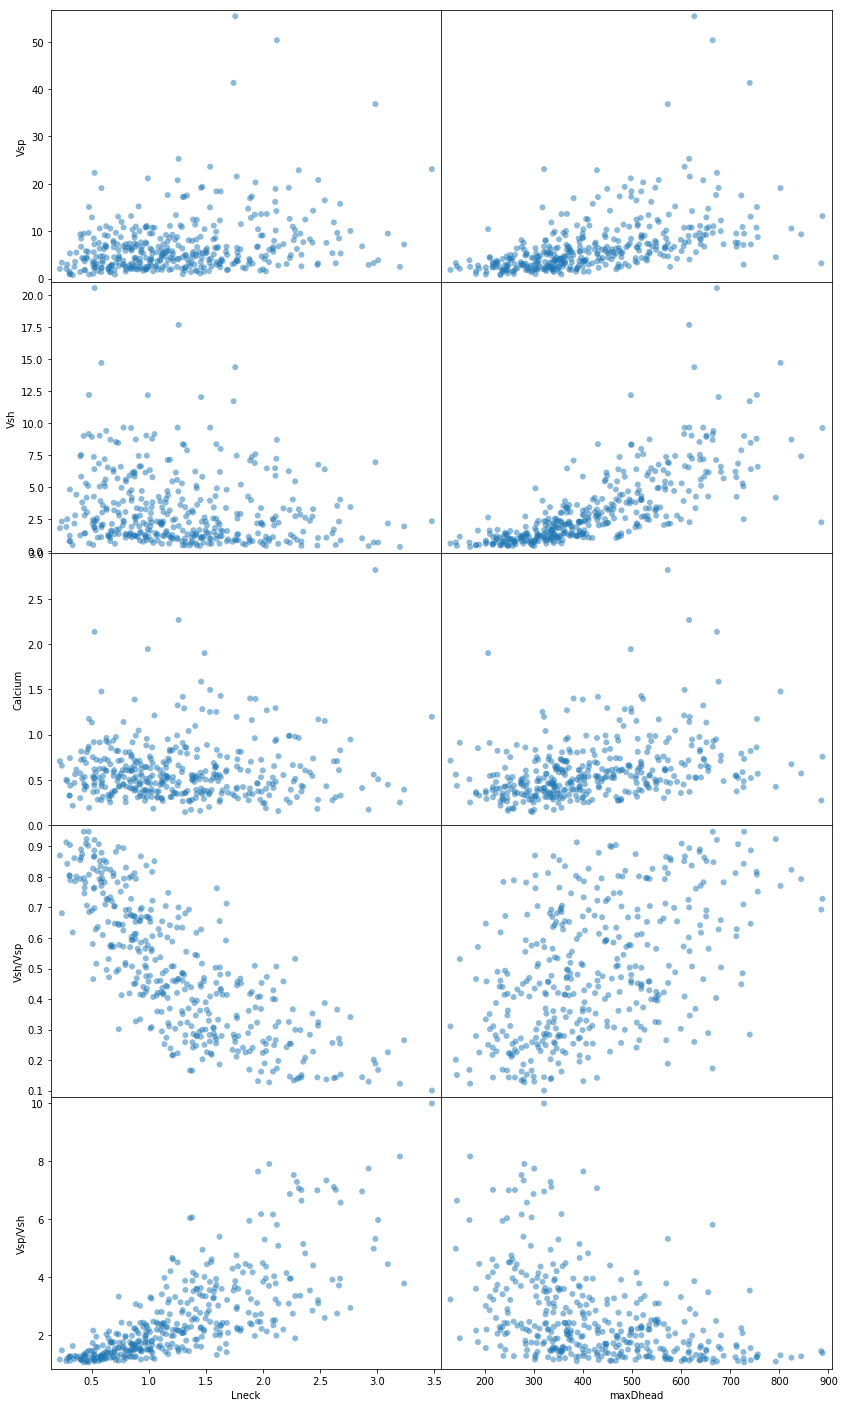

In [268]:
axes = scatter_matrix_xy(fullpd, 
                         y=['Vsp', 'Vsh', 'Calcium', 'Vsh/Vsp', 'Vsp/Vsh'], 
                         x =['Lneck', 'maxDhead'],
                         alpha=0.5, 
                         diagonal='kde', 
                         figsize = (14,25))
axes[2,0].set_ylim(0,3)
axes[2,1].set_ylim(0,3)
savefig('crosscorrelation.png', dpi = 300, tight_layout = True)

In [302]:
print(mesT[dataT['SA']==1.0,0].max())


838.9387740412781


SA+
                 0
count  211.000000
mean     0.570762
std      0.204724
min      0.142925
25%      0.412702
50%      0.571831
75%      0.749927
max      0.948375
SA-
                 0
count  173.000000
mean     0.400550
std      0.200226
min      0.100206
25%      0.242144
50%      0.350593
75%      0.515822
max      0.913412


211.60238717889342

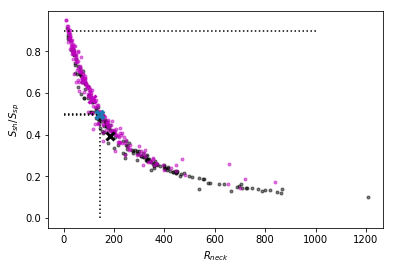

In [335]:
s0 = dataT['SA']==1.0
s1 = ~s0
#plt.figure(figsize = (14,14))
plt.plot(abs(mesT[s1,0]),(mesT[s1,2])/mesT[s1,1],'k.',label="SA-",alpha=0.5)
plt.plot(abs(mesT[s0,0]),(mesT[s0,2])/mesT[s0,1],'.',c='m',label="SA+",alpha=0.5)
#plot(abs(mesT[s1,0]),abs(mesT[s1,0])*0+1.0-.5,'k--')
#vlines(200,0.2,1.0)
#vlines(210,0.2,1.0)
#vlines(230,0.2,1.0)
plt.xlabel('$R_{neck}$')
plt.ylabel('$S_{sh}/S_{sp}$')
#print('Rneck for 50% attenuation:', 210)
#print('Fraction of spines that attenuates more than 50%:', (attenuation.values<0.5).sum()/attenuation.shape[0] )
print('SA+\n',pd.DataFrame(attenuation.values[dataT['SA']==1.0]).describe())
print('SA-\n',pd.DataFrame(attenuation.values[dataT['SA']!=1.0]).describe())


# Plot mean SA+- and all
# Plot both figures 1-atten, atten

xtt = linspace(0,145)
plt.plot(xtt,xtt*0+.5,'k:')
plt.vlines(145,0,0.5,linestyle=':')
xtt = linspace(0,1000)
plt.plot(xtt,xtt*0+.9,'k:')

#plt.plot(145,((mesT[:,2])/mesT[:,1]).mean(),'kx',
#             markersize = 10,mew=3, fillstyle = 'none')
plt.plot(145,((mesT[:,2])/mesT[:,1]).mean(),'C0x'
         ,markersize = 8,mew=4)

xtt = linspace(0,145)

plt.plot(xtt,xtt*0+((mesT[:,2])/mesT[:,1]).mean(),'k:')

#plt.plot(mesT[dataT['SA']==1.0,0].mean()*.75,attenuation.values[dataT['SA']==1.0].mean(),'kx',markersize = 10,mew=3)
plt.plot(mesT[dataT['SA']==1.0,0].mean()*.75,attenuation.values[dataT['SA']==1.0].mean(),'mx',mew=3,markersize = 8)
plt.plot(mesT[dataT['SA']==0.0,0].mean()*.60,attenuation.values[dataT['SA']==0.0].mean(),'kx',mew=3,markersize = 8)

xtt = linspace(0,145)
mean(mesT[:,0])

,0
count,383.000000
mean,0.068999
std,0.080847
min,0.005340
25%,0.025550
50%,0.046945
75%,0.079221
max,0.848026


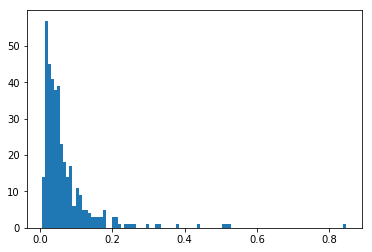

In [277]:
sel = dataT['Rhead']/dataT['Rneck']<1
plt.hist((dataT['Rhead']/dataT['Rneck'])[sel], 100)
pd.DataFrame((dataT['Rhead']/dataT['Rneck'])[sel]).describe()

,0
count,384.000000
mean,19.496406
std,13.305447
min,4.436017
25%,9.977397
50%,15.090986
75%,24.980783
max,77.983593


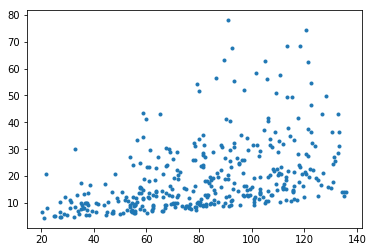

In [281]:
plt.plot(pddataT['Dss'],mesT[:,1]/mesT[:,3],'.')
pd.DataFrame(mesT[:,1]/mesT[:,3]).describe()

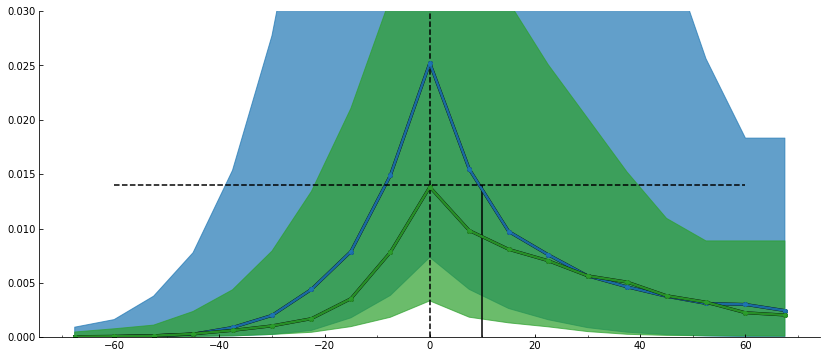

In [353]:
folderstoresp = folderstore+"spatial/"
with open(folderstoresp+"gatinginfo_lengthv31"+condition+shflag+".pickle","rb") as f:
    shle,shleh,shle0,shleh0  = pickle.load(f)

try:
    with open(folderstoresp+"gatinginfo_DIS_f"+condition+shflag+".pickle","rb") as f:
        fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
except:
    print('Gating info has failed, we try with temporary figure!')
    print(folderstoresp+"gatinginfo_f"+condition+shflag+".pickle")
    try:
        with open(folderstoresp+"gatinginfo_DIS_"+condition+"temp"+shflag+".pickle","rb") as f:
            fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
    except Exception as e:
        print('Have you ran Gating info script?')
        raise e
 
# fig = figure(figsize=(14.5,8))
fig,ax = plt.subplots(1,figsize=(14,6))
color = 'm'
xt = -arange(0,10)*7.5

ax3 = ax
ax4 = ax
axsp = 1
lab = 'Vspine'
color = 'C2'
ax0.set_axis_off()
#axl0.imshow(im2)
#axl0.set_axis_off()

#h2 = ax2.hist(fapSf[:,1]/fapSf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
#ht = ax2.hist(fapSf[:,2]/fapSf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)
h2 = histogram(1-fapSf[:,1]/fapSf[:,0],51)
ht = histogram(1-fapSf[:,2]/fapSf[:,0],51)
ht2 = histogram(1-fapSf[:,5]/fapSf[:,3],51)
ht3 = histogram(1-fapSf[:,4]/fapSf[:,3],51)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))
myl = 1.0

color0 = 'C0' # blue

color0b = 'C1' # orange

color = 'C2' # green

color2= 'C0' # blue



axss = [ax3,ax4]
axsp = 0
# ['Vspine','Vsoma','Vdendrite']
for i,lab in enumerate(['Vspine']):
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'k.-',linewidth=3,markersize=8)
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'.-',c=color0,linewidth=2.5,label='Axo-dendritic\n inhibition',markersize=8,alpha=0.9)
    axss[i].fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7,color = color0)
ax4.spines['top'].set_color('none')
ax4.spines['right'].set_color('none')


axsp = 1
for i,lab in enumerate(['Vspine']):
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'k.-',linewidth=3,markersize=8)
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],color+'.-',linewidth=2.5,label='Axo-spinous\n inhibition',markersize=8,alpha=0.9)
    axss[i].fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7,color=color)




ax4.tick_params(which='major',direction='in')
ax3.tick_params(which='major',direction='in')

ax3.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')
yloc_offonpath = 0.21 
ax4.yaxis.set_label_coords(0.5,1.03)
ax3.yaxis.set_label_coords(0.5,1.03)
ax4.set_ylim(0,0.3)
ax3.set_ylim(0,0.15)

ax3.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
ax3.tick_params(which='minor',direction='in')
ax4.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
ax4.tick_params(which='minor',direction='in')

ax4.yaxis.set_label_coords(0.02,1.1)
ax3.yaxis.set_label_coords(0.02,1.1)

#ax4.vlines(0.0,0.,1.0,linestyle='--')
ax3.vlines(0.0,0.,0.4,linestyle='--')

axss = [ax1,ax2]
axsp = 0
ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')


ax2.tick_params(which='major',direction='in')
ax1.tick_params(which='major',direction='in')

ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
yloc_offonpath = 0.21 
ax2.yaxis.set_label_coords(0.5,1.03)
ax1.yaxis.set_label_coords(0.5,1.03)
ax2.set_ylim(0,0.3)
ax1.set_ylim(0,0.15)

ax1.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
ax1.tick_params(which='minor',direction='in')
ax2.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
ax2.tick_params(which='minor',direction='in')

ax2.yaxis.set_label_coords(0.02,1.1)
ax1.yaxis.set_label_coords(0.02,1.1)

ax2.vlines(0.0,0.,1.0,linestyle='--')
ax1.vlines(0.0,0.,0.4,linestyle='--')

ax3.set_ylim(0,0.03)
xtt = linspace(-60,60)
ax4.plot(xtt, xtt*0+0.014,'k--')
vlines(10,0.,0.014)

In [358]:
mesT[:,4].mean()

0.6756621080628366

In [361]:
print(pd.DataFrame(mesT[:,1]).describe())
print(pd.DataFrame(mesT[:,3]).describe())

                0
count  384.000000
mean     6.946507
std      6.280840
min      0.721520
25%      3.035271
50%      5.315348
75%      8.692157
max     55.378814
                0
count  384.000000
mean     0.477175
std      0.449475
min      0.034373
25%      0.171494
50%      0.331312
75%      0.640809
max      3.436439
